# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
 %matplotlib inline
from matplotlib import pyplot as plt 

In [3]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from collections import Counter
import seaborn as sns

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import decomposition

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [7]:
data = pd.read_csv('sample_data/archive (3).zip')

In [8]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Проверим на нулевые и NaN значения:

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
(data == 0).astype(int).sum(axis=0)

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

На первый взгляд все ок

Посмотрим на распределение целевой переменной:

Text(0, 0.5, 'Frequency')

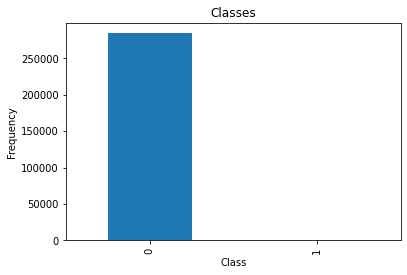

In [12]:
count_class = pd.value_counts(data['Class'], sort = True).sort_index()
count_class.plot(kind = 'bar')
plt.title("Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")

Очень плохо, посчитаем ручками:

In [13]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Видим, что датасет крайне несбалансированный.

Также видно, что колонка Amount не нормализована. Нормализуем ее, и уберем колонку время:

In [14]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [15]:
def model_performance(y_test, y_pred, y_pred_proba):
  print(f'Confusion Matrix:\n ',confusion_matrix(y_test, y_pred))
  print(f'\n Recall:', recall_score(y_test, y_pred))
  print(f'\n Accuracy Score:', accuracy_score(y_test, y_pred))
  print(f'\n Precision Score:', precision_score(y_test, y_pred))
  print(f'\n F1 Score:' ,f1_score(y_test, y_pred))
  print(f'\n Roc_Auc Score:', roc_auc_score(y_test, y_pred_proba) )
  compute_roc(y_test, y_pred, y_pred_proba)
  return

In [16]:
def compute_roc(y_test, y_pred, y_pred_proba):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [17]:
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
Counter(y_train)

Counter({0: 199008, 1: 356})

Начнем с константной модели, которая всегда будет выдавать 0. Очевидно, что у нее будет огромный accuracy, так как 99.9 процентов случаев это нулевой класс.

In [19]:
y_pred_const = np.zeros(len(X_test))
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

Confusion Matrix:
  [[85307     0]
 [  136     0]]

 Recall: 0.0

 Accuracy Score: 0.9984082955888721

 Precision Score: 0.0

 F1 Score: 0.0

 Roc_Auc Score: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



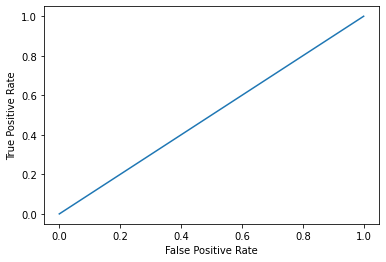

In [20]:
model_performance(y_test,y_pred_const, y_pred_proba_const)

Возьмем KNN с количеством соседей, равным 5:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)

Confusion Matrix:
  [[85293    14]
 [   31   105]]

 Recall: 0.7720588235294118

 Accuracy Score: 0.9994733330992591

 Precision Score: 0.8823529411764706

 F1 Score: 0.823529411764706

 Roc_Auc Score: 0.9483938287941338


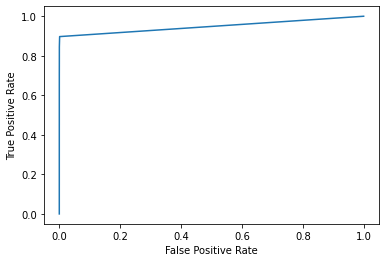

In [ ]:
model_performance(y_test,y_pred_knn, y_pred_proba_knn[:, 1])

У knn наблюдается очень хороший скор по всем метрикам, включая ту, которую надо максимизировать - recall(ниже объяснение)

Посмотрим на логическую регрессию:

In [21]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_model = logreg.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
y_pred_proba_logreg = logreg_model.predict_proba(X_test)

Confusion Matrix:
  [[83112  2195]
 [   10   126]]

 Recall: 0.9264705882352942

 Accuracy Score: 0.9741933218636986

 Precision Score: 0.05428694528220594

 F1 Score: 0.10256410256410256

 Roc_Auc Score: 0.9834061700336294


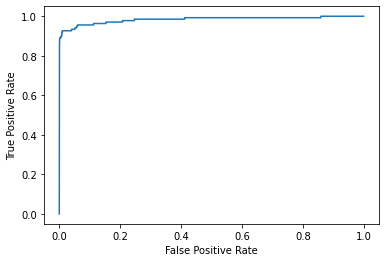

In [22]:
model_performance(y_test, y_pred_logreg, y_pred_proba_logreg[:, 1])

Деревья:

In [23]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)

Confusion Matrix:
  [[85268    39]
 [   29   107]]

 Recall: 0.7867647058823529

 Accuracy Score: 0.999204147794436

 Precision Score: 0.7328767123287672

 F1 Score: 0.7588652482269505

 Roc_Auc Score: 0.8931537667759145


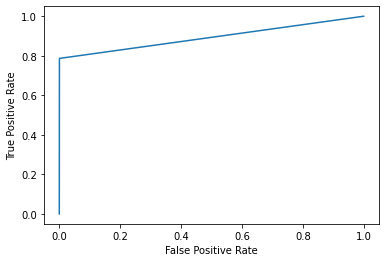

In [24]:
model_performance(y_test, y_pred_dt, y_pred_proba_dt[:, 1])

Random forest:

In [25]:
pipe = Pipeline([
    ('pca', PCA(n_components=16)),
    ('rf', RandomForestClassifier(n_estimators=25, max_depth=10, class_weight='balanced', n_jobs=8))
])


pipe.fit(X_train, y_train)

y_pred_rf = pipe.predict(X_test)
y_pred_proba_rf = pipe.predict_proba(X_test)


Confusion Matrix:
  [[85275    32]
 [   22   114]]

 Recall: 0.8382352941176471

 Accuracy Score: 0.9993679997191109

 Precision Score: 0.7808219178082192

 F1 Score: 0.8085106382978724

 Roc_Auc Score: 0.972150240756741


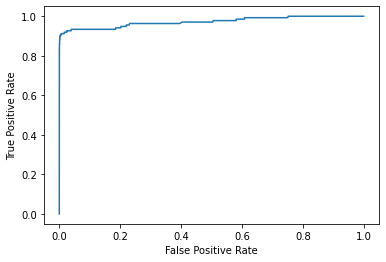

In [26]:
model_performance(y_test, y_pred_rf, y_pred_proba_rf[:, 1])

Очень хороший результат.

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Имеет смысл максимизировать recall - нам необходимо распознать как можно больше мошеннических транзакций среди всех транзакций.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Посмотрим на распределения признаков:

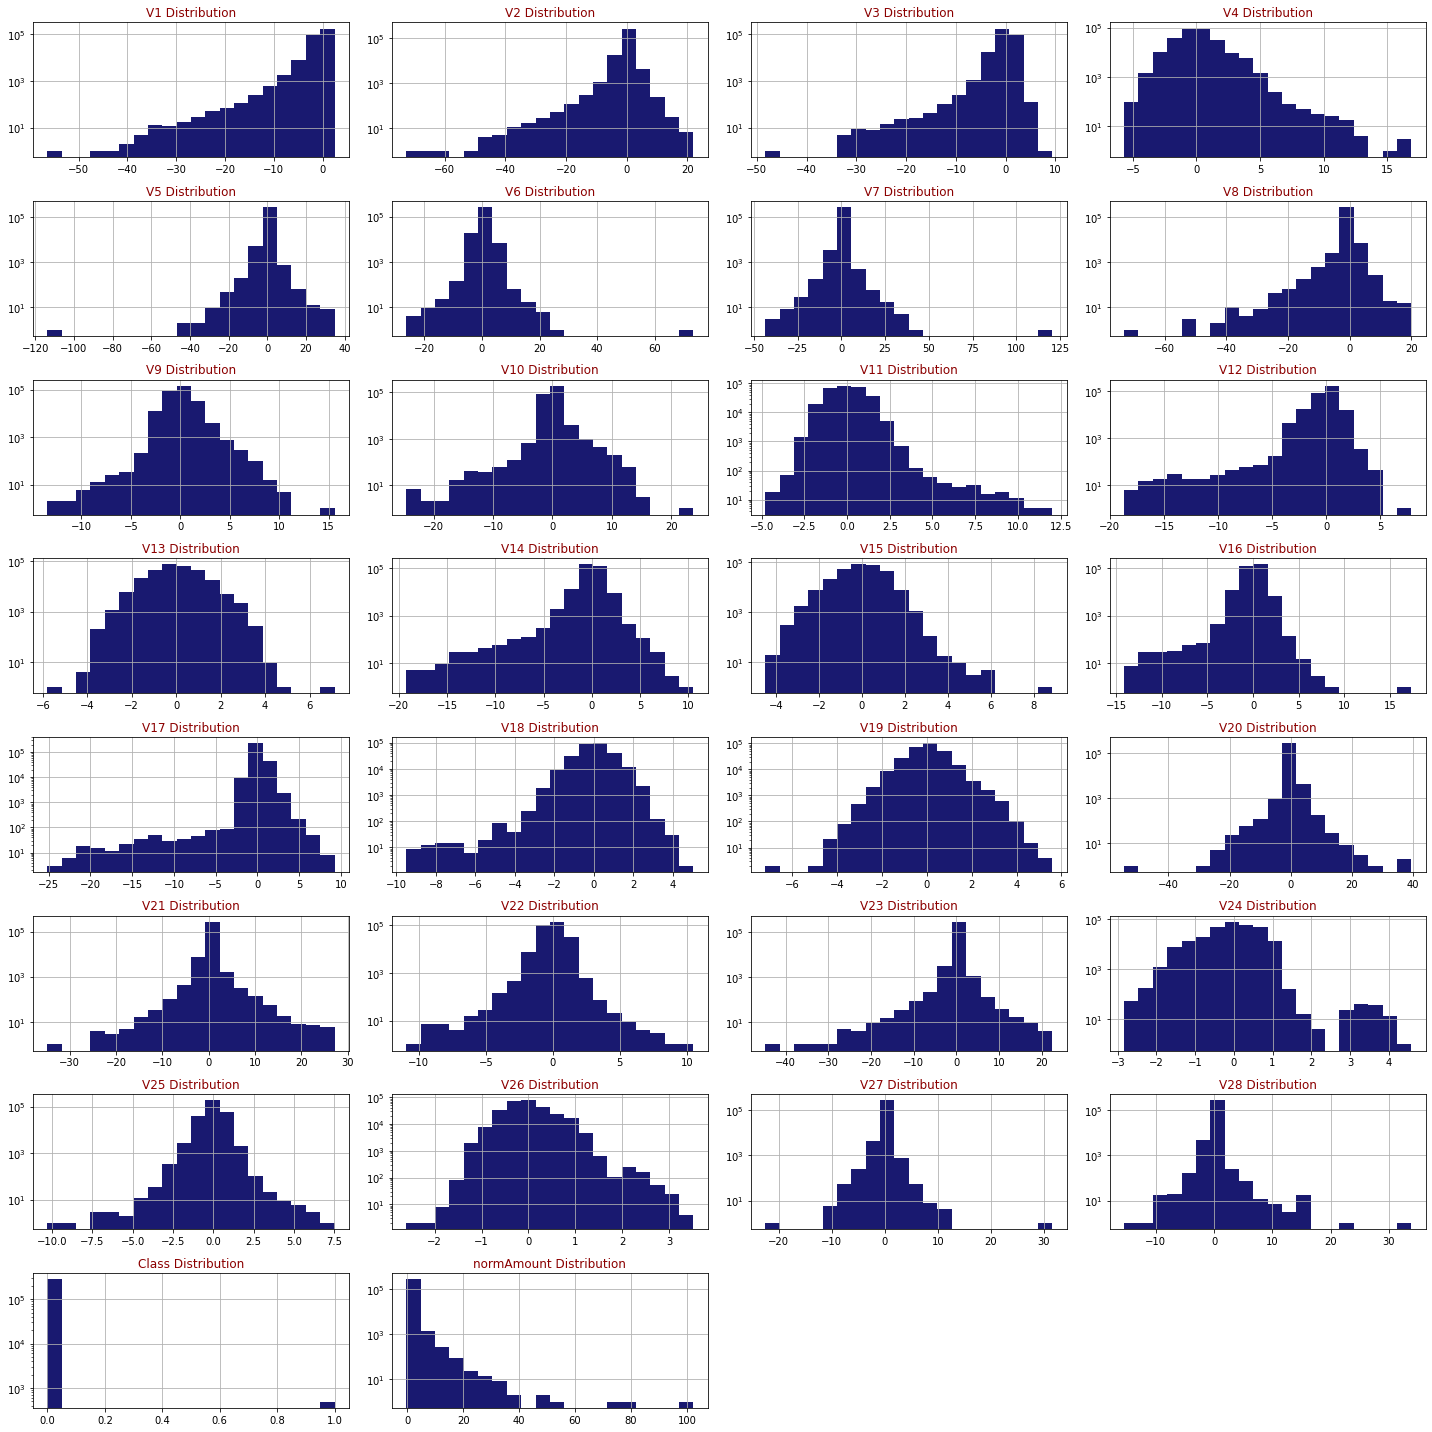

In [27]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,8,4)

Матрица корелляции:

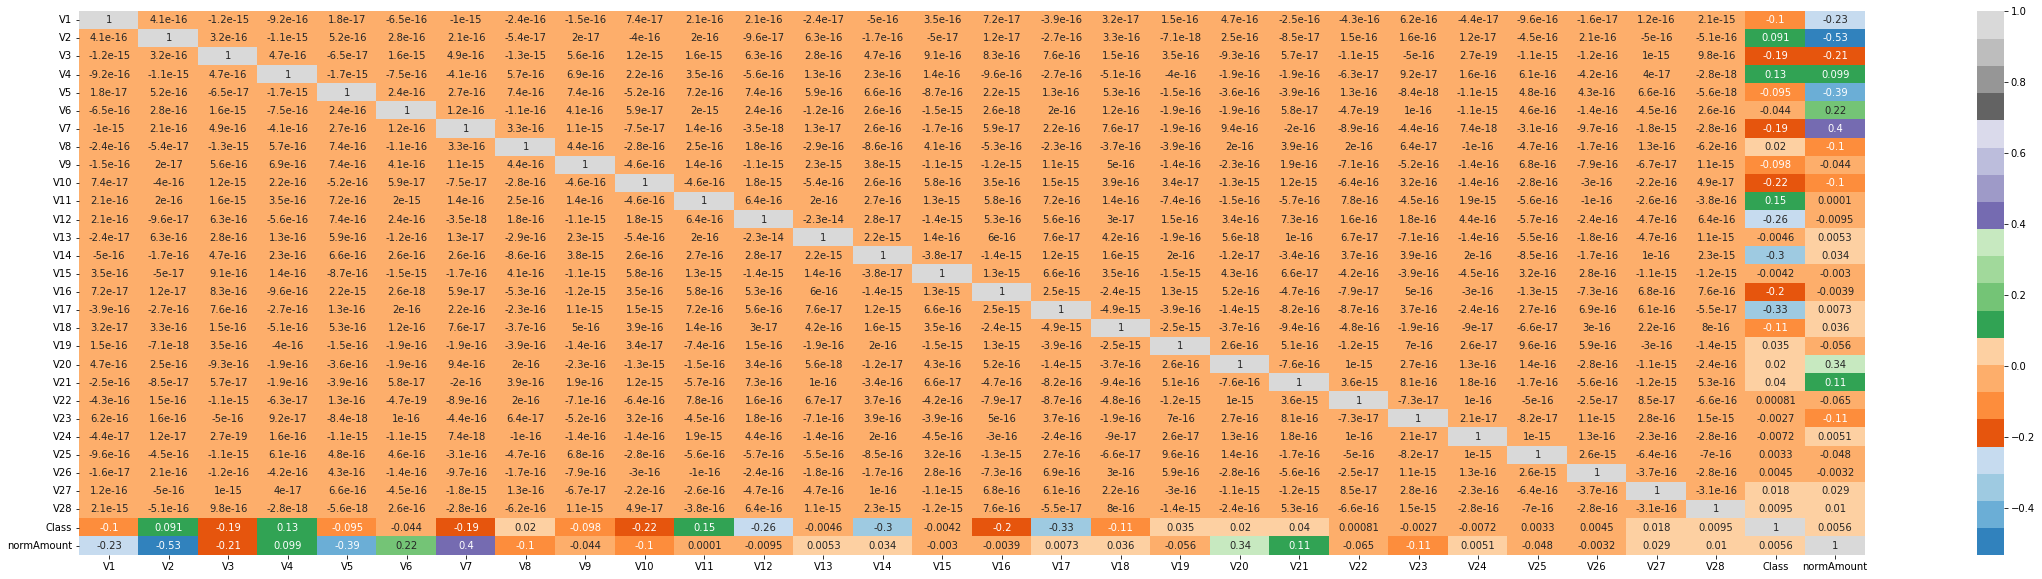

In [28]:
plt.figure(figsize = (40,10))
sns.heatmap(data.corr(), annot = True, cmap="tab20c")
plt.show()

Вообще интересно посмотреть на распределение целевого класса - для этого воспользуемся PCA:

Text(0, 0.5, 'PC2')

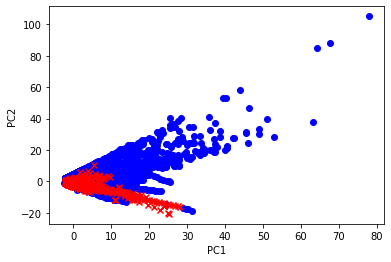

In [29]:
reduced = PCA(n_components=2).fit_transform(data.values)

plt.figure()
plt.scatter(reduced[data['Class'] == 0, 0], reduced[data['Class'] == 0, 1], color='blue')
plt.scatter(reduced[data['Class'] == 1, 0], reduced[data['Class'] == 1, 1], color='red', marker='x')
plt.xlabel("PC1")
plt.ylabel("PC2")

Видимо поэтому knn очень хорошо справляется с классификацией.

Воспользуемся GridSearchCV для поиска оптимальных гиперпараметров всех моделей. Максимизируемая метрика - recall.

К сожалению, из-за большого количества образцов, не получится воспользоваться GridSearch для KNN - очень долго считается, а время поджимает. Поэтому рассмотрим логистическую регрессию, дерево решений и random forest.

Начнем с логистической регрессии. Выбор гиперпараметров на самом деле небольшой - это solver, penalty и C.

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.624667 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.623986 (0.052705) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.623986 (0.052705) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.623986 (0.052705) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.624667 (0.052681) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.624667 (0.052681) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.624667 (0.052681) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.623986 (0.053229) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.623986 (0.053229) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.619918 (0.056127) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.616544 (0.056652) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.616544 (0.056652) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.605687 (0.054231) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.590776 (0.055512) with

In [ ]:
best_log_reg = LogisticRegression(solver='newton-cg', C=10, penalty='l2' , class_weight='balanced')

In [ ]:
best_logreg_model = best_log_reg.fit(X_train, y_train)
best_y_pred_logreg = best_log_reg.predict(X_test)
best_y_pred_proba_logreg = best_log_reg.predict_proba(X_test)

Confusion Matrix:
  [[83113  2194]
 [   10   126]]

 Recall: 0.9264705882352942

 Accuracy Score: 0.9742050255726039

 Precision Score: 0.054310344827586204

 F1 Score: 0.1026058631921824

 Roc_Auc Score: 0.9834172890439308


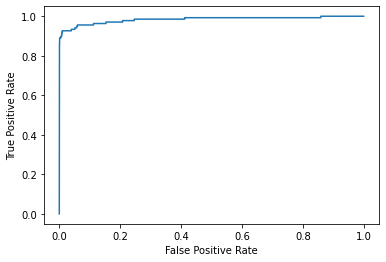

In [ ]:
model_performance(y_test, best_y_pred_logreg, best_y_pred_proba_logreg[:, 1])

Гиперпараметры решающего дерева - критерий(Gini или энтропия) и глубина. Также попробуем поперебирать параметры PCA:

In [ ]:
pca = decomposition.PCA()
dec_tree = DecisionTreeClassifier()
pipe = Pipeline(steps=[('pca', pca), ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.774129 using {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 12, 'pca__n_components': 17}
0.000000 (0.000000) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 1}
0.020346 (0.028109) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 2}
0.099217 (0.115265) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 3}
0.140012 (0.145033) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 4}
0.160750 (0.213751) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 5}
0.162791 (0.206883) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 6}
0.125953 (0.123293) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 7}
0.125850 (0.108222) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 8}
0.237786 (0.187050) with: {'

Лучший результат при использовании энтропии, максимальной глубины 12 и количестве главных компонент 17.

In [30]:
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=12)
pca = PCA(n_components=17)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
best_tree_model = best_tree.fit(X_train_pca, y_train)
best_y_pred_tree = best_tree.predict(X_test_pca)
best_y_pred_proba_tree = best_tree.predict_proba(X_test_pca)

Confusion Matrix:
  [[85275    32]
 [   29   107]]

 Recall: 0.7867647058823529

 Accuracy Score: 0.9992860737567735

 Precision Score: 0.7697841726618705

 F1 Score: 0.7781818181818181

 Roc_Auc Score: 0.8960391499490766


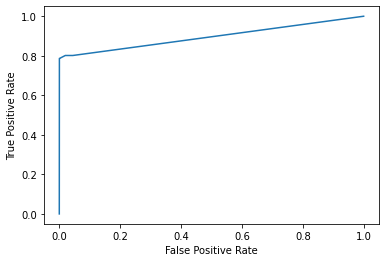

In [31]:
model_performance(y_test, best_y_pred_tree, best_y_pred_proba_tree[:, 1])

Random forest:


In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

К сожалению перебор гиперпараметров для леса не получился - считалось около 6 часов, а потом просто выкинуло из колаба. Поэтому придется довольствоваться тем лесом из первой части. 

Какой можно сделать вывод? В принципе, все модели, кроме константной, показали хороший результат для целевой метрики и площади под auc-roc. Тюнинг моделей не сильно улучшил ситуацию для дерева и логистической регрессии, тюнинг knn и случайного леса вообще не удался из-за большого объема вычислений.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Возьму датасет с данными, которые используются для того, чтобы предсказать, какой гласный звук был произнесен. Более подробное инфо - https://hastie.su.domains/ElemStatLearn/datasets/vowel.info.txt . Качать отсюда - https://hastie.su.domains/ElemStatLearn/data.html (vowel). Train часть из 500 образцов и test из 400.

In [56]:
lis_columns = ['row.names', 'y', 'x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']

In [65]:
vowel_train = pd.read_csv('sample_data/vowel.train.txt', sep=',') 
vowel_test = pd.read_csv('sample_data/vowel.test.txt', sep=',') 

Посмотрим на данные:

In [66]:
vowel_train.columns

Index(['row.names', 'y', 'x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7',
       'x.8', 'x.9', 'x.10'],
      dtype='object')

In [67]:
vowel_train

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...,...,...
523,524,7,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
524,525,8,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
525,526,9,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
526,527,10,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304


In [68]:
y_train = vowel_train['y']
X_train = vowel_train.drop(columns=['y'])
 
y_test = vowel_test['y'] 
X_test = vowel_test.drop(columns=['y']) 

Посмотрим на распределение целевой переменной в train и test датасетах:


In [70]:
Counter(y_train)

Counter({1: 48,
         2: 48,
         3: 48,
         4: 48,
         5: 48,
         6: 48,
         7: 48,
         8: 48,
         9: 48,
         10: 48,
         11: 48})

In [71]:
Counter(y_test)

Counter({1: 42,
         2: 42,
         3: 42,
         4: 42,
         5: 42,
         6: 42,
         7: 42,
         8: 42,
         9: 42,
         10: 42,
         11: 42})

Видим, что распределение целевой переменной хорошее, датасет сбалансированный.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

Ситуация с константной моделью будет намного печальнее, чем в предыдущей части дз - классы сбалансированы, их 11 - соответственно accuracy константной модели будет в районе 0.09.

Возьмем логистическую регрессию, knn, decision tree и random forest.

Начнем с логистической регрессии:

In [75]:
log_reg = LogisticRegression(max_iter=10000, penalty='l2')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)

In [76]:
accuracy_score(y_test, y_pred_log_reg)

0.42424242424242425

In [106]:
print(precision_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_log_reg, average='macro'))

0.43895226374257157
0.42424242424242437
0.4200946265285472


KNN:

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

In [78]:
accuracy_score(y_test, y_pred_knn)

0.09090909090909091

In [107]:
print(precision_score(y_test, y_pred_knn, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.024319629415170817
0.09090909090909091
0.03837368661489265


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Decision tree:

In [79]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)

In [80]:
accuracy_score(y_test, y_pred_dt)

0.3939393939393939

In [108]:
print(precision_score(y_test, y_pred_dt, average='macro'))
print(recall_score(y_test, y_pred_dt, average='macro'))
print(f1_score(y_test, y_pred_dt, average='macro'))

0.40880845782040026
0.393939393939394
0.39449428860321745


Random forest:

In [81]:
pipe = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=25, max_depth=10, class_weight='balanced', n_jobs=8))
])


pipe.fit(X_train, y_train)

y_pred_rf = pipe.predict(X_test)
y_pred_proba_rf = pipe.predict_proba(X_test)

In [82]:
accuracy_score(y_test, y_pred_rf)

0.5476190476190477

In [109]:
print(precision_score(y_test, y_pred_rf, average='macro'))
print(recall_score(y_test, y_pred_rf, average='macro'))
print(f1_score(y_test, y_pred_rf, average='macro'))

0.573954974722605
0.5476190476190476
0.5515510493402367


Лучший accuracy у random forest.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Хороший вопрос, какую метрику оптимизировать. Для данного датасета, так как он сбалансирован, целевой метрикой стоит считать accuracy. Но заодно посмотрим на macro precision, recall и f1.


Опять начнем с логистической регрессии:

In [83]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.730914 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.730914 (0.052529) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.442525 (0.056673) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.599637 (0.049927) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.728411 (0.051230) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.441255 (0.062391) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.578193 (0.058932) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.683575 (0.057367) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.444932 (0.062703) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.554802 (0.051375) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.589611 (0.051991) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.457583 (0.047904) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.472811 (0.046593) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.444533 (0.057760) wit

In [87]:
best_log_reg = LogisticRegression(solver='newton-cg', C=100, penalty='l2' )
best_logreg_model = best_log_reg.fit(X_train, y_train)
best_y_pred_logreg = best_log_reg.predict(X_test)
best_y_pred_proba_logreg = best_log_reg.predict_proba(X_test)

In [88]:
accuracy_score(y_test, best_y_pred_logreg)

0.48917748917748916

In [102]:
print(precision_score(y_test, best_y_pred_logreg, average='macro'))
print(recall_score(y_test, best_y_pred_logreg, average='macro'))
print(f1_score(y_test, best_y_pred_logreg, average='macro'))

0.5098616844268405
0.48917748917748916
0.4911064169393772


KNN:

In [89]:
model = KNeighborsClassifier()
k_range = list(range(1, 31))
grid = dict(n_neighbors=k_range)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.036006 using {'n_neighbors': 20}
0.000000 (0.000000) with: {'n_neighbors': 1}
0.000000 (0.000000) with: {'n_neighbors': 2}
0.000000 (0.000000) with: {'n_neighbors': 3}
0.000000 (0.000000) with: {'n_neighbors': 4}
0.000000 (0.000000) with: {'n_neighbors': 5}
0.000000 (0.000000) with: {'n_neighbors': 6}
0.000000 (0.000000) with: {'n_neighbors': 7}
0.000000 (0.000000) with: {'n_neighbors': 8}
0.000000 (0.000000) with: {'n_neighbors': 9}
0.000629 (0.003387) with: {'n_neighbors': 10}
0.001258 (0.004706) with: {'n_neighbors': 11}
0.000000 (0.000000) with: {'n_neighbors': 12}
0.000000 (0.000000) with: {'n_neighbors': 13}
0.000000 (0.000000) with: {'n_neighbors': 14}
0.000000 (0.000000) with: {'n_neighbors': 15}
0.003834 (0.011523) with: {'n_neighbors': 16}
0.006313 (0.012323) with: {'n_neighbors': 17}
0.013873 (0.018195) with: {'n_neighbors': 18}
0.023972 (0.023354) with: {'n_neighbors': 19}
0.036006 (0.025572) with: {'n_neighbors': 20}
0.030285 (0.025641) with: {'n_neighbors': 21}
0.

In [90]:
best_knn = KNeighborsClassifier(n_neighbors=20)
best_knn_model = best_knn.fit(X_train, y_train)
best_y_pred_knn = best_knn.predict(X_test)
best_y_pred_proba_knn = best_knn.predict_proba(X_test)

In [100]:
accuracy_score(y_test, best_y_pred_knn)

0.0021645021645021645

In [103]:
print(precision_score(y_test, best_y_pred_knn, average='macro'))
print(recall_score(y_test, best_y_pred_knn, average='macro'))
print(f1_score(y_test, best_y_pred_knn, average='macro'))

0.0002642706131078224
0.0021645021645021645
0.0004710315591144607


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Decision tree:

In [93]:
dec_tree = DecisionTreeClassifier()
pipe = Pipeline(steps=[('dec_tree', dec_tree)])
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.539587 using {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 10}
0.242336 (0.070390) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2}
0.412722 (0.113442) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 4}
0.496011 (0.092832) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 6}
0.503522 (0.102839) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 8}
0.497934 (0.075634) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 10}
0.488464 (0.075301) with: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 12}
0.285840 (0.044981) with: {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 2}
0.431734 (0.109445) with: {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 4}
0.492219 (0.072931) with: {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 6}
0.516783 (0.080596) with: {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 8}
0.539587 (0.083207) with: {'dec_tree__criterion': 'entropy', 'd

In [94]:
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_tree_model = best_tree.fit(X_train, y_train)
best_y_pred_tree = best_tree.predict(X_test)
best_y_pred_proba_tree = best_tree.predict_proba(X_test)

In [95]:
accuracy_score(y_test, best_y_pred_tree)

0.42857142857142855

In [104]:
print(precision_score(y_test, best_y_pred_tree, average='macro'))
print(recall_score(y_test, best_y_pred_tree, average='macro'))
print(f1_score(y_test, best_y_pred_tree, average='macro'))

0.41380484612040597
0.4285714285714286
0.4148158231062587


Random forest:

In [96]:
model = RandomForestClassifier()
n_estimators = [10, 20, 30, 40]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.961502 using {'max_features': 'sqrt', 'n_estimators': 40}
0.922315 (0.033654) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.945065 (0.030697) with: {'max_features': 'sqrt', 'n_estimators': 20}
0.955818 (0.035248) with: {'max_features': 'sqrt', 'n_estimators': 30}
0.961502 (0.029894) with: {'max_features': 'sqrt', 'n_estimators': 40}
0.921081 (0.040614) with: {'max_features': 'log2', 'n_estimators': 10}
0.942550 (0.037645) with: {'max_features': 'log2', 'n_estimators': 20}
0.954523 (0.033774) with: {'max_features': 'log2', 'n_estimators': 30}
0.960256 (0.028990) with: {'max_features': 'log2', 'n_estimators': 40}


In [98]:
best_rf = RandomForestClassifier(max_features='sqrt', n_estimators=40)
best_rf_model = best_rf.fit(X_train, y_train)
best_y_pred_rf = best_rf.predict(X_test)
best_y_pred_proba_rf = best_rf.predict_proba(X_test)

In [99]:
accuracy_score(y_test, best_y_pred_rf)

0.5562770562770563

In [105]:
print(precision_score(y_test, best_y_pred_rf, average='macro'))
print(recall_score(y_test, best_y_pred_rf, average='macro'))
print(f1_score(y_test, best_y_pred_rf, average='macro'))

0.593780631038845
0.5562770562770563
0.5613604924810989


С точки зрения целевой переменной лучшим оказался random forest. результат конечно не самый лучший, скор в 0.55 довольно удручающий.